In [1]:
options(pkgType = "binary", repos = "https://cran-archive.r-project.org/")

In [2]:
#Libraries:
install.packages("ISLR2")
install.packages("boot")
install.packages("tidyverse")
install.packages("readr")
install.packages("grf")
install.packages("sandwich")
install.packages("lmtest")
install.packages("Hmisc")
library(ISLR2)
library(boot)
library(tidyverse)
library(readr)
library(grf)
library(sandwich)
library(lmtest)
library(Hmisc)

Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ISLR2' is not available (as a binary package for R version 3.6.1)"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\user\Documents\R\win-library\3.6\00LOCK\readr\libs\x64\readr.dll  a C:\Users\user\Documents\R\win-library\3.6\readr\libs\x64\readr.dll: Permission denied"Warning message:
"restored 'readr'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'grf' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'grf'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\user\Documents\R\win-library\3.6\00LOCK\grf\libs\x64\grf.dll  a C:\Users\user\Documents\R\win-library\3.6\grf\libs\x64\grf.dll: Permission denied"Warning message:
"restored 'grf'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\user\Documents\R\win-library\3.6\00LOCK\lmtest\libs\x64\lmtest.dll  a C:\Users\user\Documents\R\win-library\3.6\lmtest\libs\x64\lmtest.dll: Permission denied"Warning message:
"restored 'lmtest'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Hmisc' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Hmisc'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\user\Documents\R\win-library\3.6\00LOCK\Hmisc\libs\x64\Hmisc.dll  a C:\Users\user\Documents\R\win-library\3.6\Hmisc\libs\x64\Hmisc.dll: Permission denied"Warning message:
"restored 'Hmisc'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpQHClKc\downloaded_packages


Warning message:
"package 'boot' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message

# Bootstraping

In [3]:
bd=read.table("../../data/penn_jae.dat",header=TRUE)
bd=bd %>%
    filter(tg==0|tg==4)
head(bd)

abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10607,4,9,9,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
10845,0,27,27,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [4]:
alpha.fn <- function(data, index) {
  X <- data$X[index]
  Y <- data$Y[index]
  (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

### Log(inuidur1) with T4

In [5]:
bd1=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(Y=log_inuidur1,X=tg)
head(bd1)    
alpha.fn(bd1, 1:1000)

Y,X
2.890372,0
0.000000,0
3.295837,0
2.197225,4
3.295837,0
3.295837,0


[1] 0.2939055


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd1, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.2967502 0.0001485967 0.004224614

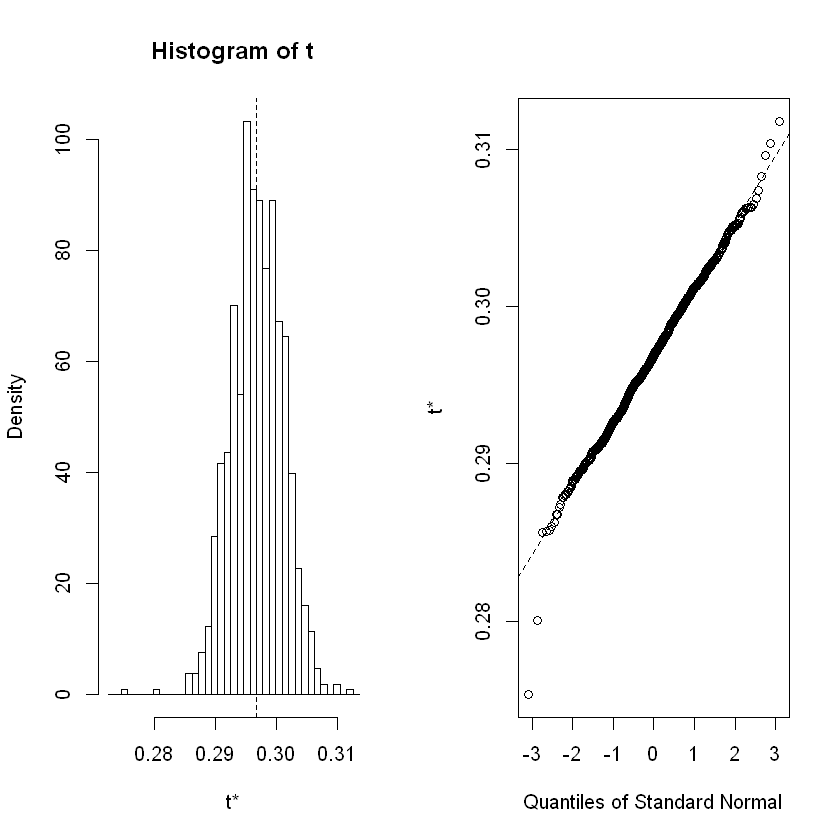

In [6]:
#1000 times
x1=boot(bd1, alpha.fn, R = 1000)
x1
plot(x1)

### Log(inuidur1) with female

In [7]:
bd2=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(Y=log_inuidur1,X=female)
head(bd2)    
alpha.fn(bd2, 1:1000)

Y,X
2.890372,0
0.000000,0
3.295837,0
2.197225,0
3.295837,0
3.295837,1


[1] 0.8683386


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd2, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8712819 0.0001318269 0.004214896

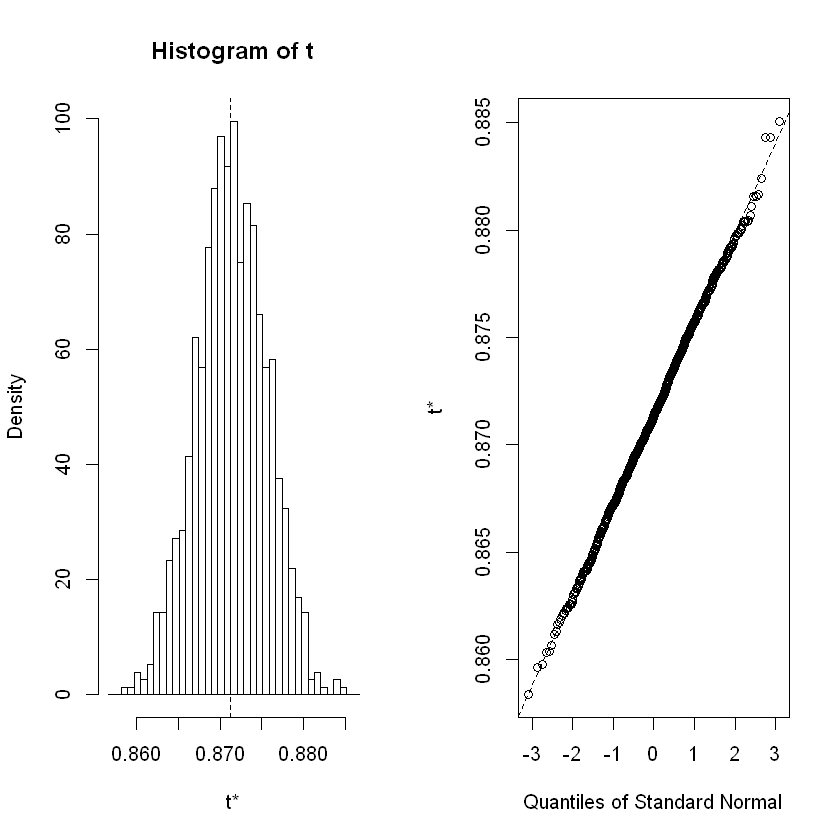

In [8]:
#1000 times
x2=boot(bd2, alpha.fn, R = 1000)
x2
plot(x2)

### Log(inuidur1) with black

In [9]:
bd3=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(Y=log_inuidur1,X=black)
head(bd3)    
alpha.fn(bd3, 1:1000)

Y,X
2.890372,0
0.000000,0
3.295837,0
2.197225,0
3.295837,0
3.295837,0


[1] 0.9220945


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd3, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.9169107 6.487956e-05 0.003934253

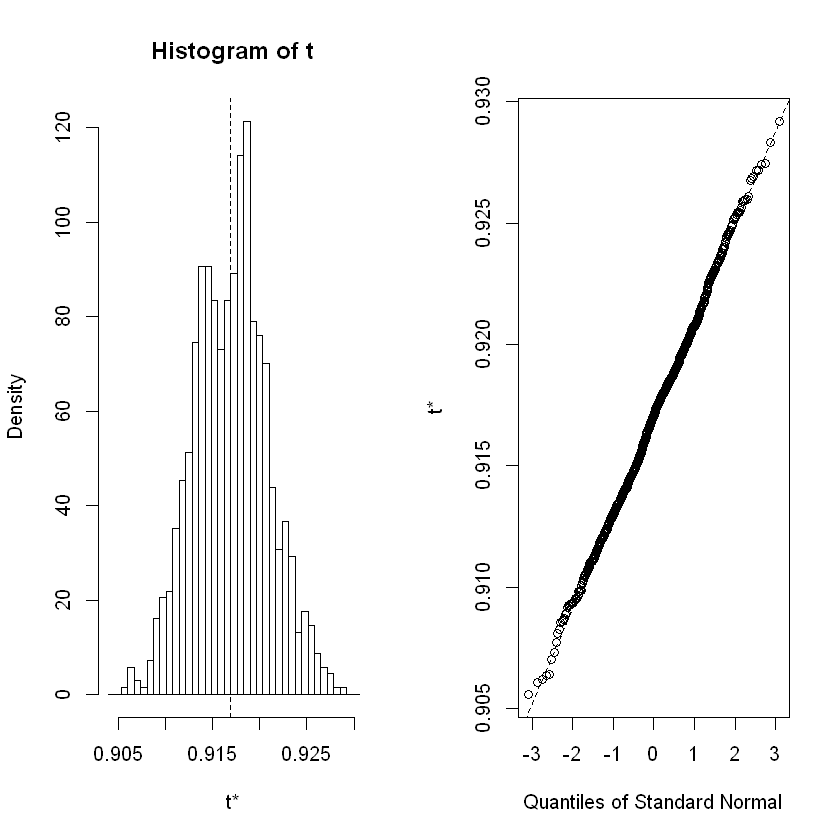

In [10]:
#1000 times
x3=boot(bd3, alpha.fn, R = 1000)
x3
plot(x3)

In [11]:
bd4=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(log_inuidur1,tg,female,black,othrace,dep,q2,q3,q4,q5,q6,agelt35,agegt54,durable,lusd,husd)
head(bd4)

boot.fn <- function(data, index){
 coef(lm(log_inuidur1 ~ tg+female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd, data = data, subset = index))   
}

log_inuidur1,tg,female,black,othrace,dep,q2,q3,q4,q5,q6,agelt35,agegt54,durable,lusd,husd
2.890372,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1
0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3.295837,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2.197225,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3.295837,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0
3.295837,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


In [12]:
reg_lineal = boot(bd4, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd4, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  6.533692e-03 0.152177832
t2*  -0.017923121 -1.193150e-04 0.009006437
t3*   0.126368328 -3.655472e-04 0.034244856
t4*  -0.293767980  2.753040e-03 0.059835702
t5*  -0.472445058  6.524245e-03 0.236657837
t6*   0.029866899  2.131470e-03 0.053044154
t7*   0.096186517  8.621896e-04 0.047198106
t8*   0.073678072 -6.499649e-03 0.150179897
t9*  -0.038506537 -5.502363e-03 0.149282142
t10* -0.054949195 -6.924532e-03 0.150750016
t11* -0.144177912 -4.245511e-03 0.148840400
t12*  0.003361318 -4.195865e-03 0.162070504
t13* -0.162772168 -5.792106e-04 0.036135861
t14*  0.229666708 -3.855654e-03 0.056803801
t15*  0.126557359 -2.679068e-03 0.047489573
t16* -0.175352572 -6.515480e-04 0.041509884
t17* -0.105224727 -1.818379e-05 0.044307310

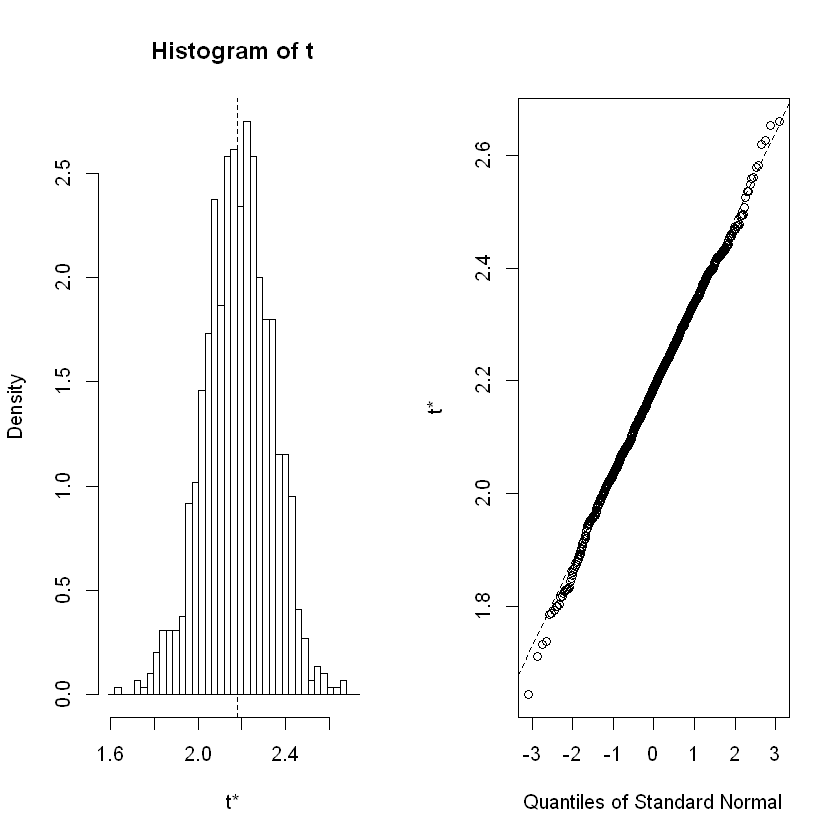

In [13]:
plot(reg_lineal, index=1) #intercept

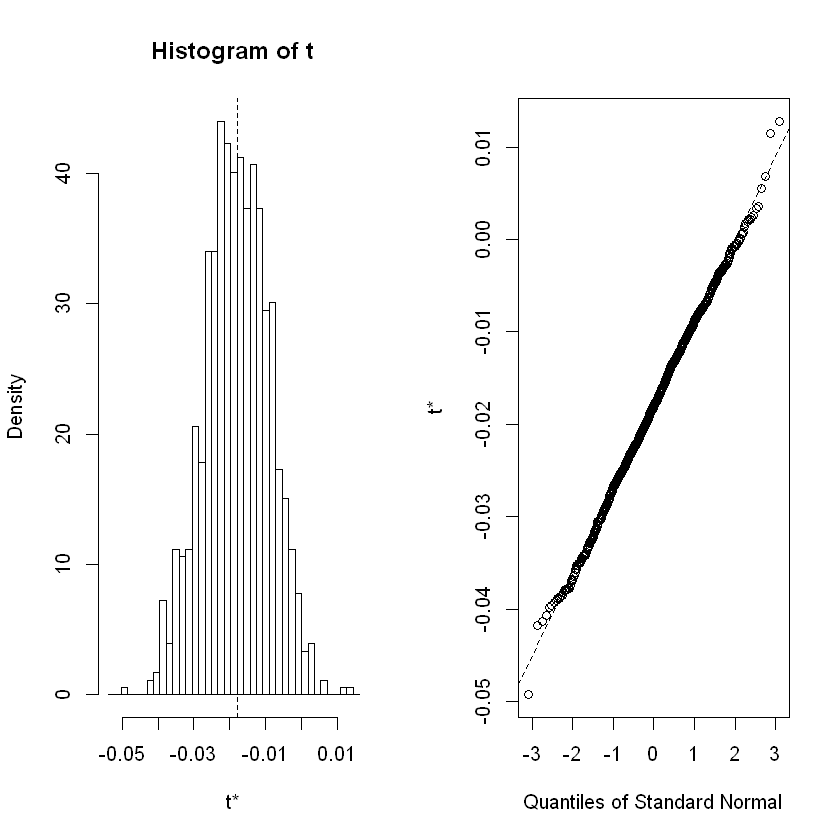

In [14]:
plot(reg_lineal, index=2) #tg coef

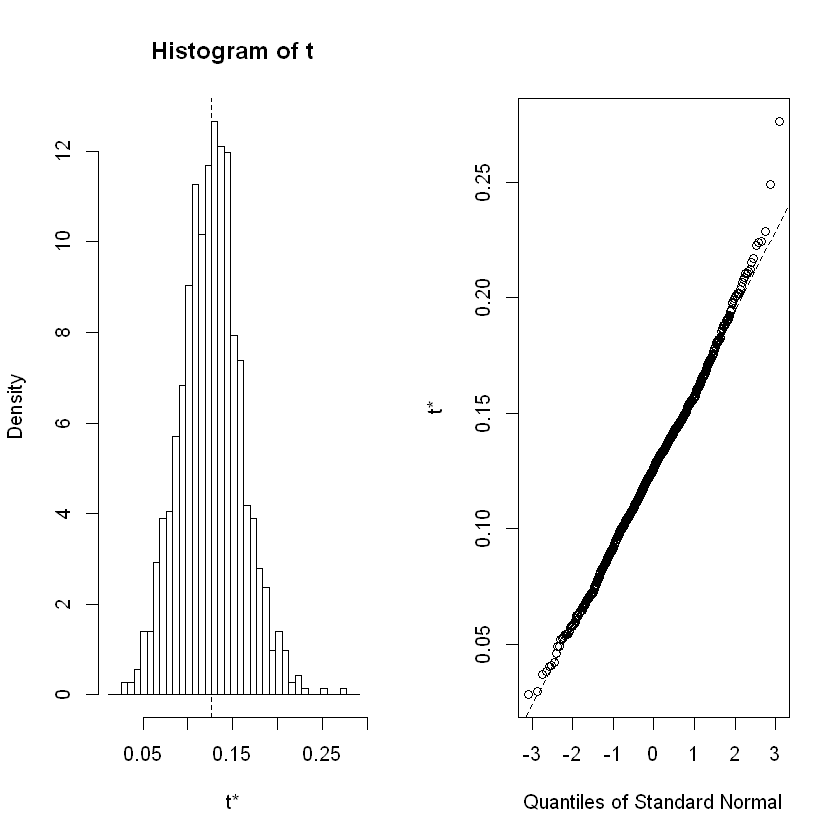

In [15]:
plot(reg_lineal, index=3) #female coef

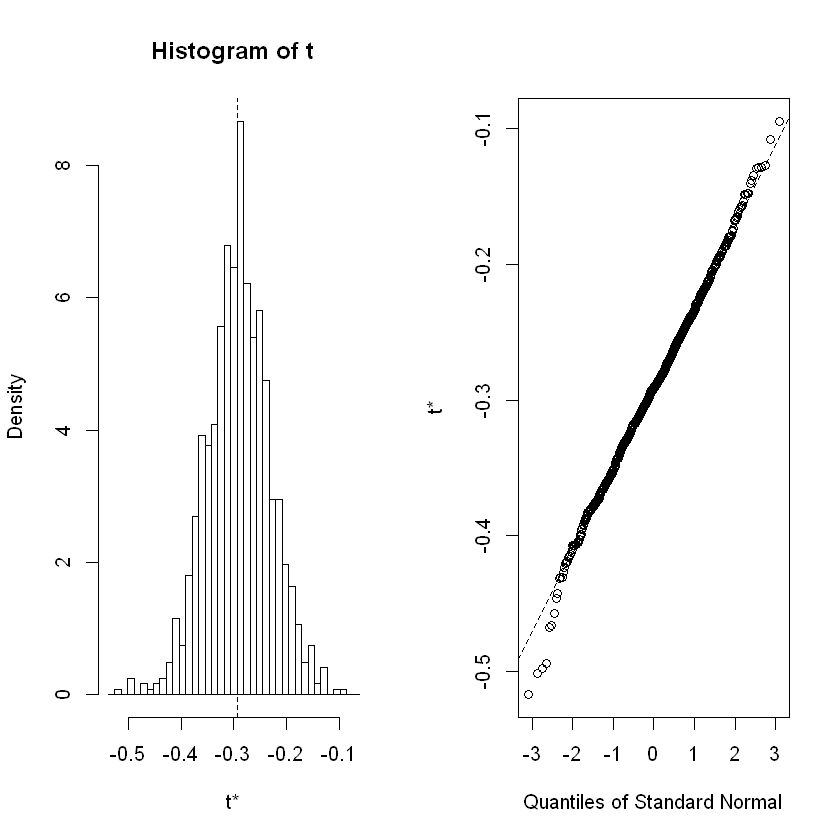

In [16]:
plot(reg_lineal, index=4) #black coef

In [17]:
sds=data.frame(variables=c("tg","female","black"),std_error=c(0.005096029,0.021363115,0.037749723))
print(sds)

  variables   std_error
1        tg 0.005096029
2    female 0.021363115
3     black 0.037749723


In this code, we start by adjusting the database to include only the variables we need. Then, we perform bootstrapping in two ways: first, using only one explanatory variable (e.g., `female`, `tg`, or `black`), and second, using these three variables along with some control variables. In both cases, we obtain the coefficients from a regression of our chosen variables. We then use the `boot` function to generate multiple samples, which gives us a distribution of the coefficients.

Specifically, we adjust the Predictive Grouped Data (PGDs) from those presented in class to match this new database accurately. For all cases, we plot the distributions. In the second bootstrapping method, we focus on the first three rows that provide information on `tg`, `female`, and `black` in the presence of other variables (index = 1, 2, and 3). Note that the third row differs from the class example because we needed this variable, whereas in class, data from only two variables were presented.

Finally, we retain the standard errors and present them in a tale.


# Causal forest

In [18]:
url="https://raw.githubusercontent.com/grf-labs/grf/f79679d72124db505b92aca0be0ab2a694b70749/experiments/acic18/synthetic_data.csv"
data.all=read_csv(url)
head(data.all)


-- Column specification --------------------------------------------------------
cols(
  schoolid = col_double(),
  Z = col_double(),
  Y = col_double(),
  S3 = col_double(),
  C1 = col_double(),
  C2 = col_double(),
  C3 = col_double(),
  XC = col_double(),
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double()
)



schoolid,Z,Y,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
76,1,0.08160167,6,4,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.38586896,4,12,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.39818373,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.17503685,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.88458337,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.09056477,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567


The document explains the construction of a causal forest, which is an adaptation of the random forest algorithm. The random forest predictions are averaged over multiple trees. Each tree is grown on a subsample of the data, which is drawn considering the clusters (schools) to account for the potential correlations within clusters. For prediction, only trees that do not include the observation's cluster are used.

In [19]:
data.all$schoolid = factor(data.all$schoolid)
DF = data.all[,-1]
school.id = as.numeric(data.all$schoolid)
school.mat = model.matrix(~ schoolid + 0, data = data.all)
school.size = colSums(school.mat)

The ATE is estimated using causal forests. It involves averaging the treatment effects predicted by each tree in the forest. The document provides the formula for estimating ATE and discusses the impact of clustering on the precision of the estimates. Without clustering, the confidence interval for ATE is narrower, but this might lead to overoptimistic results​

In [20]:
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)

W = DF$Z
Y = DF$Y
X.raw = DF[,-(1:2)]

C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

# Grow a forest. Add extra trees for the causal forest.

Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)
varimp = variable_importance(cf.raw)
selected.idx = which(varimp > mean(varimp))

cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")
tau.hat = predict(cf)$predictions

# Estimate ATE

ATE = average_treatment_effect(cf)
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))


Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2079  -0.9088  -0.8297   1.4176   1.9556  

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.9

[1] "95% CI for the ATE: 0.246 +/- 0.041"

The best linear predictor analysis is performed by testing the calibration of the causal forest predictions. This involves comparing the predicted treatment effects with actual outcomes to ensure the model's predictions are unbiased. The analysis reveals significant differences when clustering is ignored, indicating the importance of accounting for clustering in the model​

In [21]:
test_calibration(cf)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         0.990040   0.081962 12.0792 <2e-16 ***
differential.forest.prediction 0.082704   0.637930  0.1296 0.4484    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The analysis examines heterogeneity in treatment effects across schools. This is done by comparing the estimates from a cluster-robust causal forest with those from a non-cluster-robust version. The results show that ignoring clustering leads to overfitting and artificial detection of heterogeneity due to school-specific effects​


	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0396, df = 71.913, p-value = 0.003303
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19278658 -0.04006791
sample estimates:
mean of x mean of y 
0.1882880 0.3047153 



	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 1.0315, df = 72.418, p-value = 0.3057
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03879265  0.12200789
sample estimates:
mean of x mean of y 
0.2673055 0.2256979 


                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2  0.084 0.04199   1.371   0.26
Residuals        73  2.236 0.03064               


	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.1805, df = 75, p-value = 0.03235
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.007186194 0.159129160
sample estimates:
 mean of x 
0.08315768 


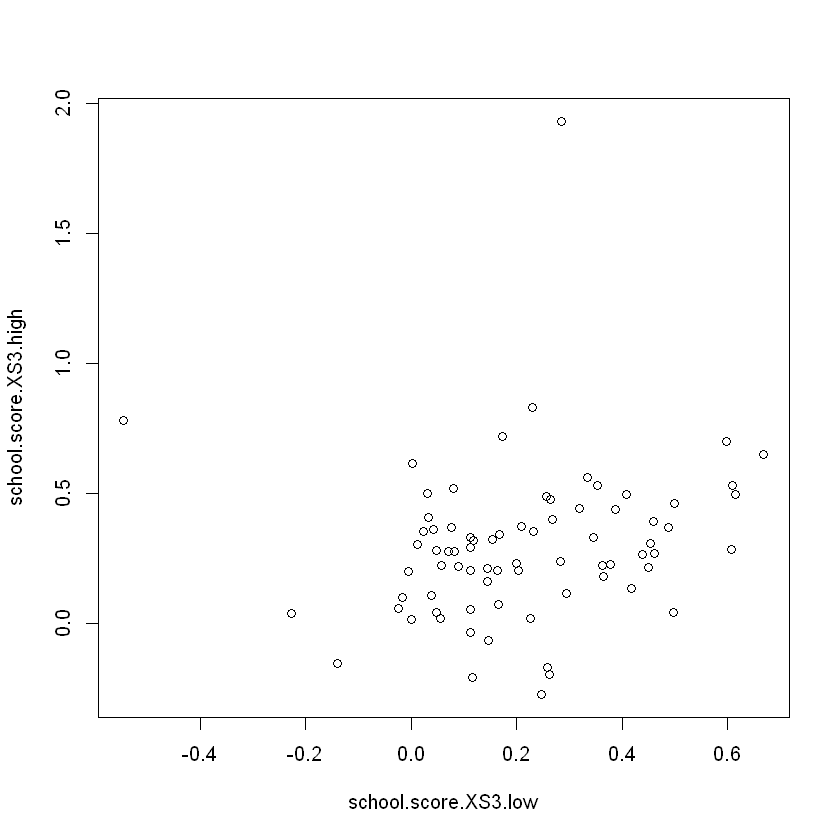

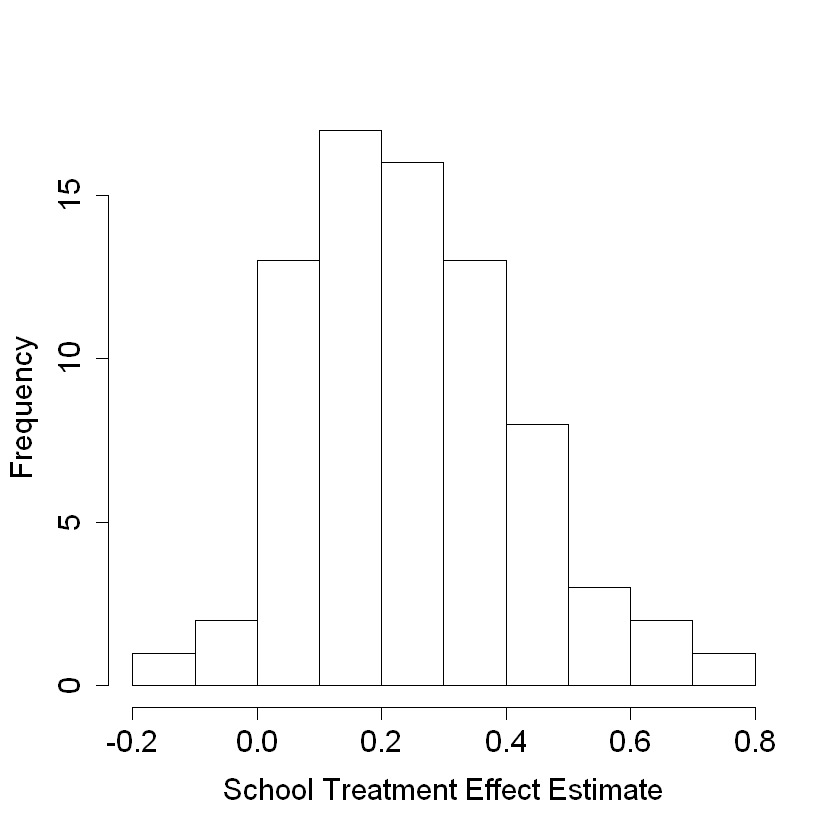

In [22]:
dr.score = tau.hat + W / cf$W.hat *
  (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])

school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])

school.X2.levels = cut(school.X2,
  breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))

school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) /
  t(school.mat) %*% (X$S3 >= 6)
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) /
  t(school.mat) %*% (X$S3 < 6)

plot(school.score.XS3.low, school.score.XS3.high)
t.test(school.score.XS3.high - school.score.XS3.low)

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")

In [23]:
ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))

[1] "0.247 +/- 0.04"


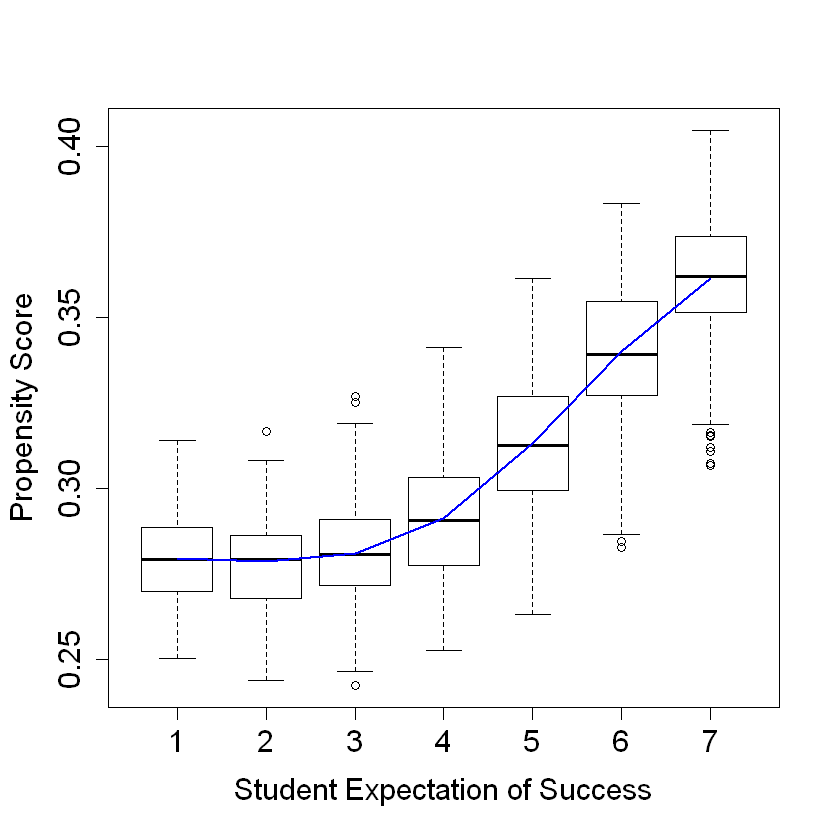

In [24]:
DF = X
DF$W.hat = cf$W.hat

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)

An analysis without clustering shows markedly different results, with narrower confidence intervals and apparent heterogeneity. However, these findings are attributed to overfitting rather than genuine heterogeneity, emphasizing the necessity of considering clustering in the analysis​

[1] "95% CI for the ATE: 0.252 +/- 0.022"


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.006825   0.045059 22.3444 < 2.2e-16 ***
differential.forest.prediction 0.547933   0.132450  4.1369 1.774e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction         1.009696   0.066775 15.1209 < 2e-16 ***
differential.forest.prediction 0.293322   0.226067  1.2975 0.09724 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] -0.0001547144  0.0003292132

                     Df Sum Sq Mean Sq F value  Pr(>F)    
factor(school.id)    75    203   2.709   1.999 7.3e-07 ***
Residuals         10315  13978   1.355                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

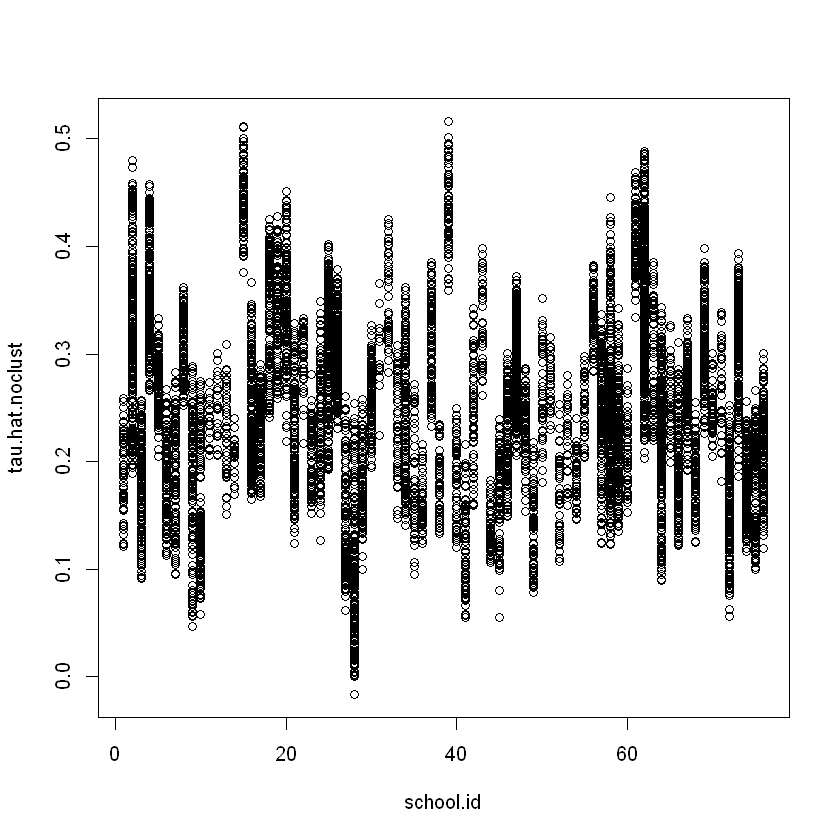

In [25]:
cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")

ATE.noclust = average_treatment_effect(cf.noclust)
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

test_calibration(cf.noclust)

tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

tau.hat.crossfold = rep(NA, length(Y))
for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id
test_calibration(cf.noclust.cpy)

Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

summary(aov(dr.score ~ factor(school.id)))

The document doesn't explicitly cover an analysis without fitting the propensity score. However, the general approach in causal forests includes estimating the propensity score and using it in the treatment effect estimation. Ignoring this step would likely lead to biased estimates

[1] "95% CI for the ATE: 0.254 +/- 0.04"

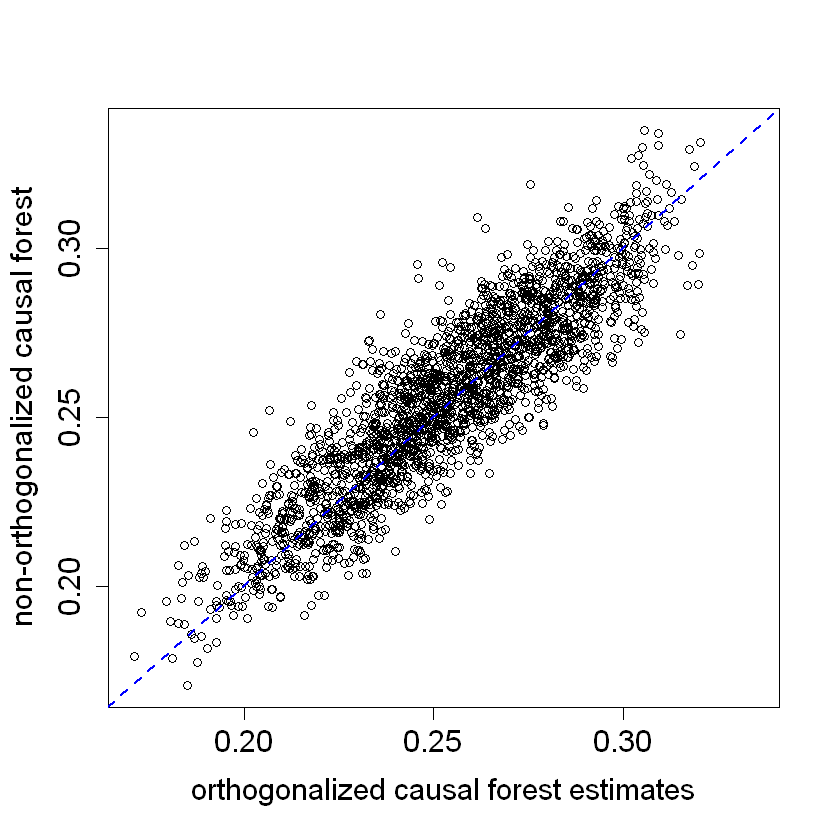

In [26]:
cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)
tau.hat.noprop = predict(cf.noprop)$predictions

ATE.noprop = average_treatment_effect(cf.noprop)
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef

The plots:
1. **Histogram of Estimated CATE**: Displays the distribution of the conditional average treatment effects (CATE) estimates. This allows for visualizing the heterogeneity in treatment effects.

2. **Box Plot of CATE vs X1**: Examines how the school-level variable X1 (pre-existing mindset norms) might moderate the treatment effect.

3. **Box Plot of CATE vs X2**: Similar to the previous one but explores the variable X2, which is the achievement level of the school.

4. **Scatter Plot of School-wise Forest Predictions**: Compares average CATE predictions at the school level with predictions based on a regression forest, illustrating how school covariates might relate to treatment heterogeneity.

5. **Histograms of CATE Estimates Without Propensity and Without Clustering**: These histograms compare CATE estimates when clustering effects by schools and propensity scores are not considered, showing how omitting these can impact the estimates.

6. **Per-School Prediction Comparison**: This plot compares treatment effect predictions for each school, showing variability and possibly identifying schools with unique features in terms of treatment effects.


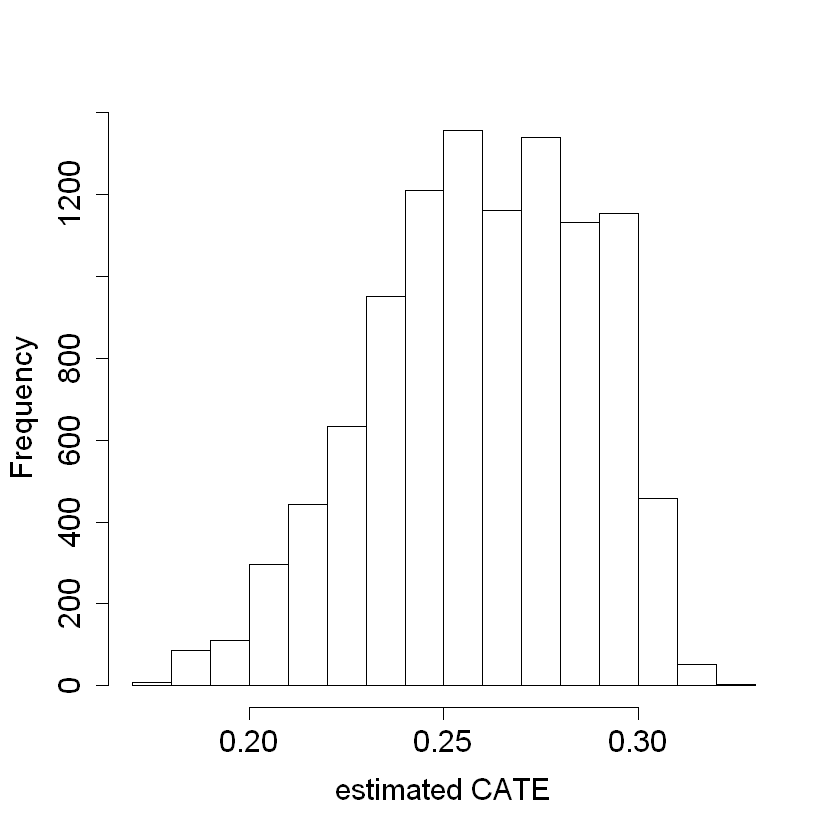

ERROR: Error in hist.default(tau.hat.noclust, xlab = "estimated CATE", main = "", : some 'x' not counted; maybe 'breaks' do not span range of 'x'


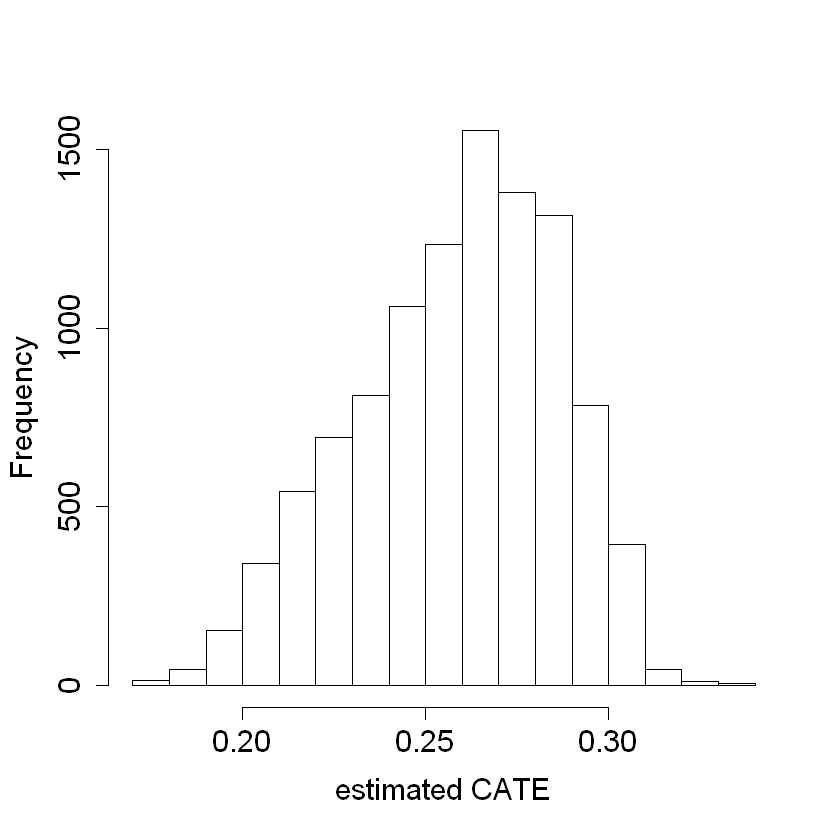

In [27]:
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat, xlab = "estimated CATE", main = "")

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noprop, xlab = "estimated CATE", main = "")

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noclust, xlab = "estimated CATE", main = "",
     breaks = seq(-0.0, 0.55, by = 0.55 / 25))


pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X1), xlab = "X1", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X1"], tau.hat, df = 4), lwd = 2, col = 4)

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X2), xlab = "X2", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X2"], tau.hat, df = 4), lwd = 2, col = 4)

school.avg.tauhat = t(school.mat) %*% tau.hat / school.size

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(school.avg.tauhat, school.pred, cex = 1.5,
     xlim = range(school.avg.tauhat, school.pred),
     ylim = range(school.avg.tauhat, school.pred),
     xlab = "average CATE estimate in school",
     ylab = "school-wise forest predictions")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef

Visualizations should include school-level covariates to explore their relationship with treatment heterogeneity. This involves plotting the estimated treatment effects against covariates to identify patterns or anomalies that could indicate school-specific effects​

In [ ]:
school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))
school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

graph=ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
print(graph)

mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])

The Conditional Average Treatment Effect (CATE) is estimated for each school to capture the heterogeneity in treatment effects. This involves using the causal forest to predict treatment effects at the school level and examining the variability across different schools

In [ ]:
ord = order(order(school.pred))
school.sort = ord[school.id]

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef